In [1]:
"""
Michael E. Ramsey
CSCI 5352
Date Created: 11/01/18
Last Edited: 12/3/18

This is a python script to visualize the features constructed by:
"Facebook_Feature_Generator.ipynb"

I primarily plot histograms and bar plot comparing the features of edges
to non-edges.
"""

# Get necessary libraries
import sys
from os import listdir
from os.path import isfile, join
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import scipy
from scipy import linalg
from scipy.sparse import csr_matrix
from random import randint
import itertools

C:\Users\mikee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
"""
Extract all filenames for facebook100 dataset
"""

# Get list of filenames that contain edge information
# Had to exclude a bunch of files that I did not need
# Could have done this more efficiently
filepath = "Facebook_Features_97/"
files = [f for f in listdir(filepath) if isfile(join(filepath, f))]
files

['American75.csv',
 'Amherst41.csv',
 'Bowdoin47.csv',
 'Brandeis99.csv',
 'Bucknell39.csv',
 'Caltech36.csv',
 'Colgate88.csv',
 'Hamilton46.csv',
 'Haverford76.csv',
 'Howard90.csv',
 'Johns Hopkins55.csv',
 'Lehigh96.csv',
 'Middlebury45.csv',
 'MIT8.csv',
 'Oberlin44.csv',
 'Pepperdine86.csv',
 'Reed98.csv',
 'Rice31.csv',
 'Rochester38.csv',
 'Santa74.csv',
 'Smith60.csv',
 'Swarthmore42.csv',
 'Trinity100.csv',
 'USFCA72.csv',
 'Vassar85.csv',
 'Vermont70.csv',
 'Wellesley22.csv',
 'Wesleyan43.csv',
 'William77.csv',
 'Williams40.csv']

In [3]:
"""
Load the data
"""
# Choose the dataset to import
filename = 'Hamilton46.csv'

# Load the data
data = pd.read_csv(filepath + filename)

# Delete the first column
data = data.drop(columns = ['Unnamed: 0'])

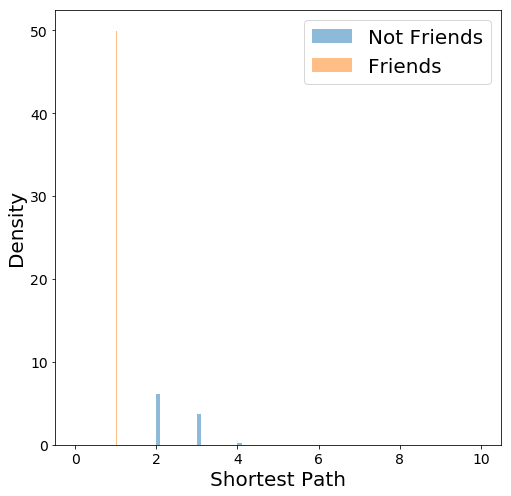

In [5]:
"""
Shorest Path
"""
subdata = data.groupby('edge')['shortest_path']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Shortest Path", size = 20)
#ax.set_xlim((0, 150))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 100, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
#plt.savefig('Shortest_path.png')

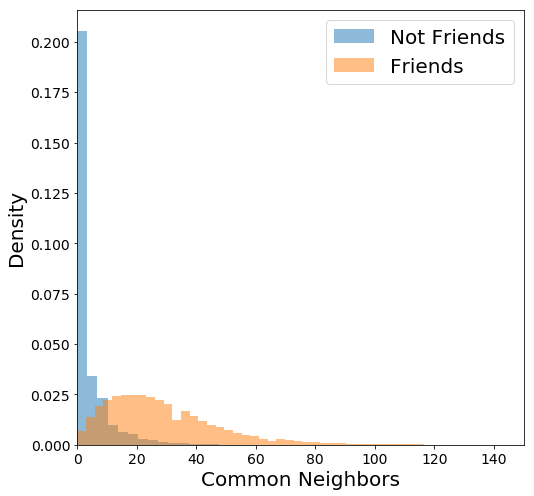

In [52]:
"""
Common neighbors
"""
subdata = data.groupby('edge')['common_neighbors']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Common Neighbors", size = 20)
ax.set_xlim((0, 150))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 100, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('Neighbors.png')

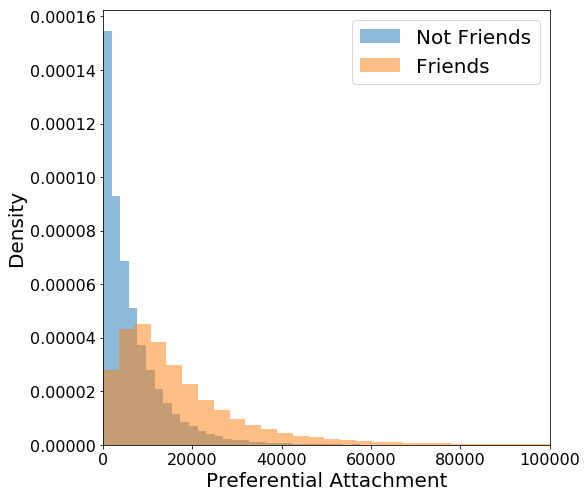

In [51]:
"""
Preferential Attachment
"""
subdata = data.groupby('edge')['pref_attach']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Preferential Attachment", size = 20)
ax.set_xlim((0, 100000))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 100, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig("Preferential.png")

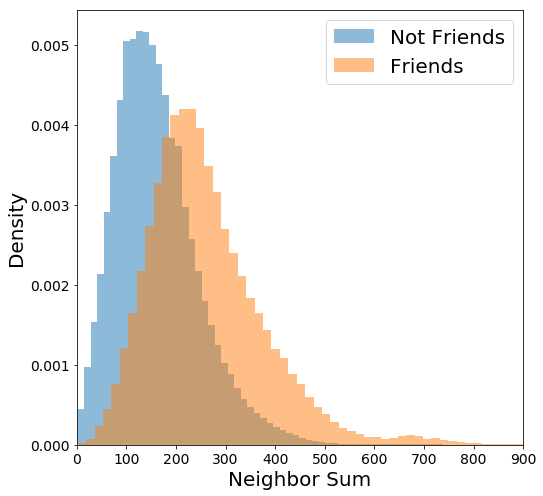

In [53]:
"""
Neighbor Sum
"""
subdata = data.groupby('edge')['neighbor_sum']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Neighbor Sum", size = 20)
ax.set_xlim((0, 900))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig("NeighborSum.png")

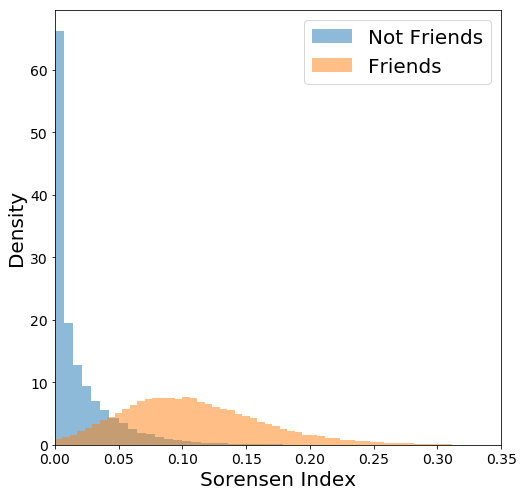

In [54]:
"""
Sorensen Index
"""
subdata = data.groupby('edge')['sorensen']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Sorensen Index", size = 20)
ax.set_xlim((0, .35))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig("Sorensen.png")

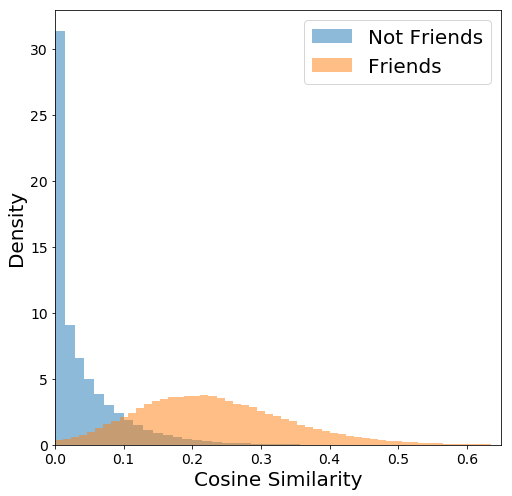

In [55]:
"""
Cosine Similarity
"""
subdata = data.groupby('edge')['cosine_sim']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Cosine Similarity", size = 20)
ax.set_xlim((0, .65))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('Cosine.png')

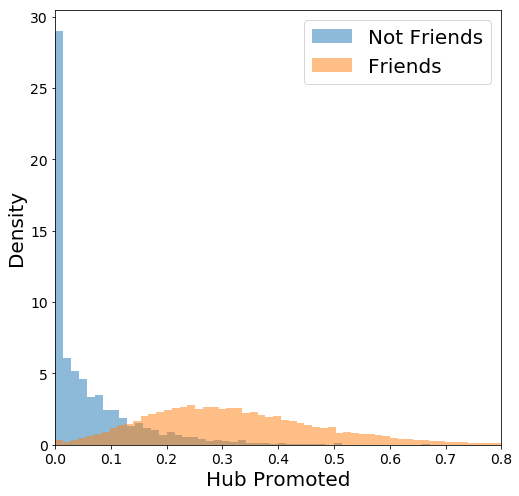

In [56]:
"""
Hub Promoted
"""
subdata = data.groupby('edge')['hub_prom']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Hub Promoted", size = 20)
ax.set_xlim((0, .8))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('Hubprom.png')

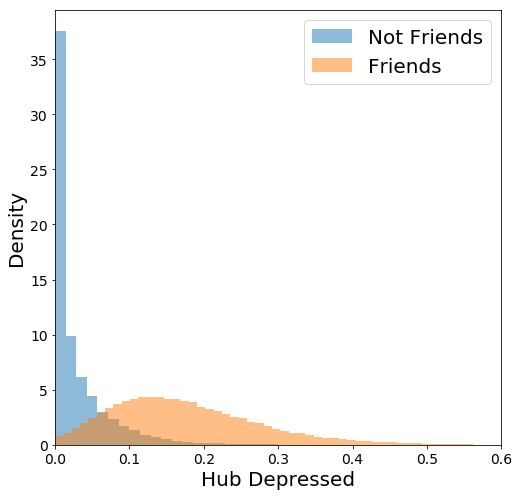

In [57]:
"""
Hub Promoted
"""
subdata = data.groupby('edge')['hub_depr']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Hub Depressed", size = 20)
ax.set_xlim((0, .6))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('Hubdepr.png')

Text(0,0.5,'Density')

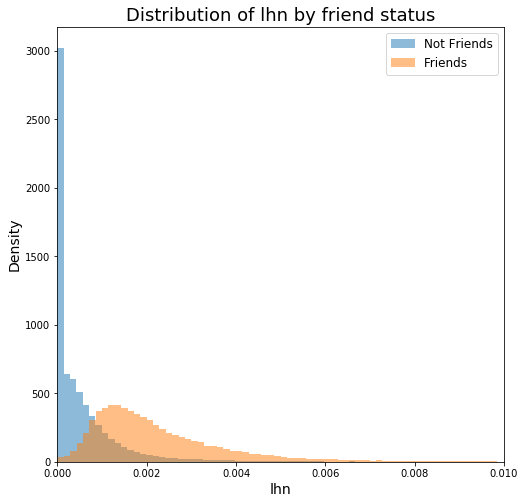

In [111]:
"""
LHN - looks like garbage
"""
subdata = data[data['lhn'] < .01]
subdata = subdata.groupby('edge')['lhn']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("lhn", size = 14)
ax.set_xlim((0, .01))
ax.set_title('Distribution of lhn by friend status', size = 18)
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 12)
ax.set_ylabel("Density", size = 14)

Text(0,0.5,'Density')

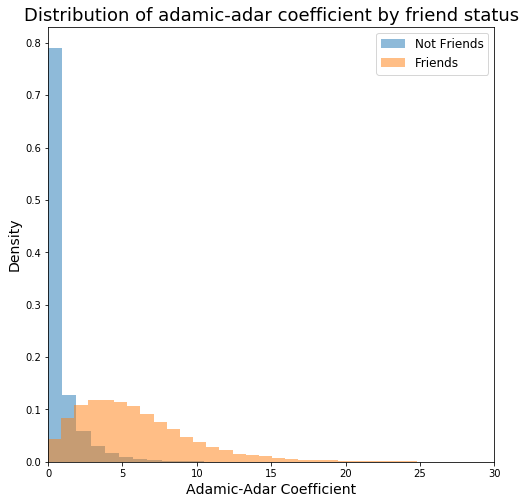

In [114]:
"""
Adamic Adar
"""
subdata = data[data['adamic_adar'] < 500]
subdata = subdata.groupby('edge')['adamic_adar']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Adamic-Adar Coefficient", size = 14)
ax.set_xlim((0, 30))
ax.set_title('Distribution of adamic-adar coefficient by friend status', size = 18)
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 12)
ax.set_ylabel("Density", size = 14)

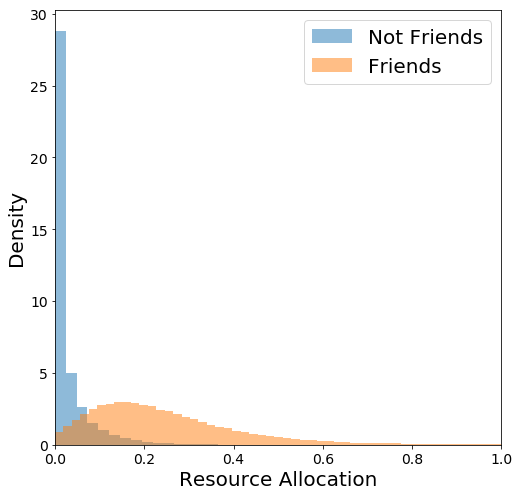

In [58]:
"""
Resource Allocation
"""
subdata = data.groupby('edge')['resource_all']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Resource Allocation", size = 20)
ax.set_xlim((0, 1))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 200, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('Resourceall.png')

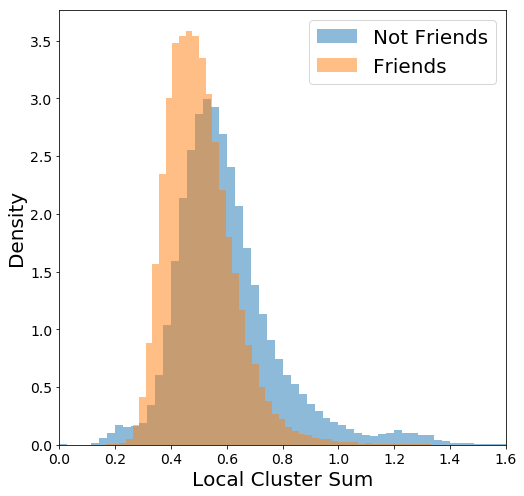

In [59]:
"""
Local Cluster Sum
"""
subdata = data.groupby('edge')['local_cluster_sum']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Local Cluster Sum", size = 20)
ax.set_xlim((0, 1.6))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('Clustersum.png')

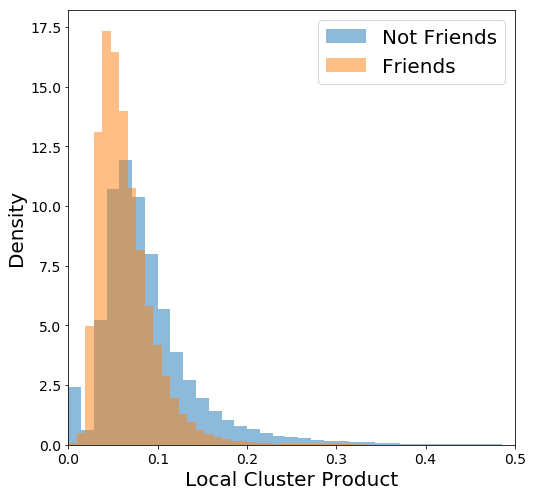

In [60]:
"""
Local Cluster Product
"""
subdata = data.groupby('edge')['local_cluster_prod']
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Local Cluster Product", size = 20)
ax.set_xlim((0, .5))
myfigure = subdata.plot(kind = 'hist', ax=ax, bins = 70, density = True, alpha = .5)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Density", size = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('Clusterprod.png')

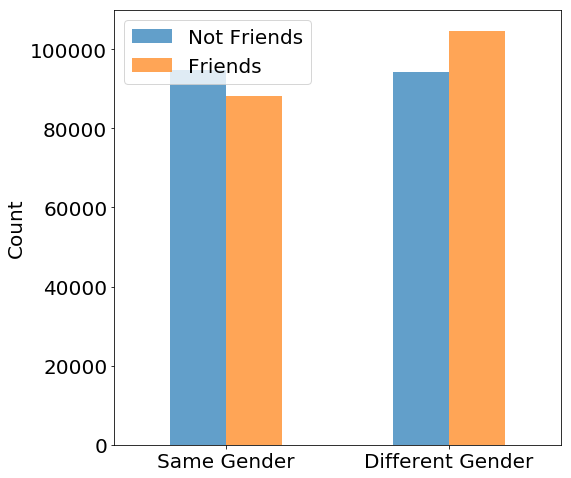

In [67]:
"""
Same Gender
"""
subdata = data.groupby('edge')['same_gender']
counts = subdata.value_counts()
counts = [np.array(list(counts))[[0,3]], np.array(list(counts))[[1,2]]]
group_labels = ['Same Gender', 'Different Gender']
df = pd.DataFrame(counts, index = group_labels)
fig, ax = plt.subplots(figsize=(8,8))
myfigure = df.plot.bar(alpha = .7, ax = ax, rot =  0)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Count", size = 20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.savefig('Gender.png')

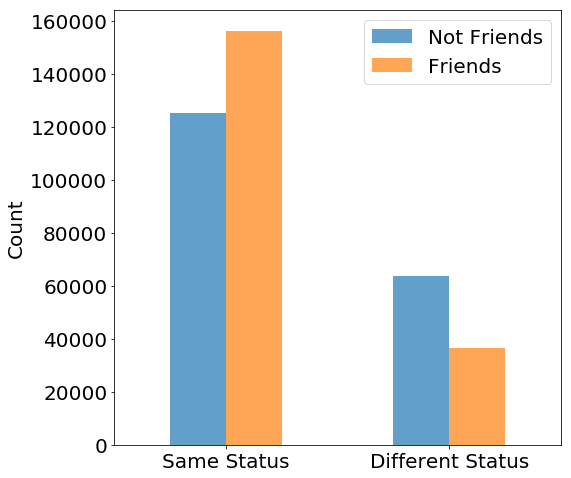

In [63]:
"""
Same Status
"""
subdata = data.groupby('edge')['same_status']
counts = subdata.value_counts()
counts = [np.array(list(counts))[[0,2]], np.array(list(counts))[[1,3]]]
group_labels = ['Same Status', 'Different Status']
df = pd.DataFrame(counts, index = group_labels)
fig, ax = plt.subplots(figsize=(8,8))
myfigure = df.plot.bar(alpha = .7, ax = ax, rot =  0)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Count", size = 20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.savefig('Status.png')

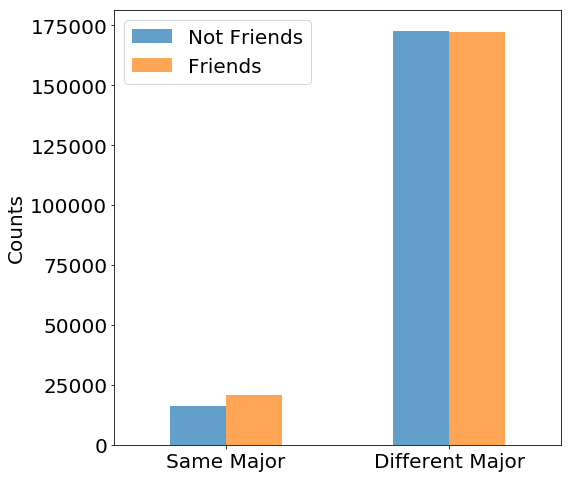

In [64]:
"""
Same Major
"""
subdata = data.groupby('edge')['same_major']
counts = subdata.value_counts()
counts = [np.array(list(counts))[[1,3]], np.array(list(counts))[[0,2]]]
group_labels = ['Same Major', 'Different Major']
df = pd.DataFrame(counts, index = group_labels)
fig, ax = plt.subplots(figsize=(8,8))
myfigure = df.plot.bar(alpha = .7, ax = ax, rot =  0)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Counts", size = 20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.savefig('major.png')

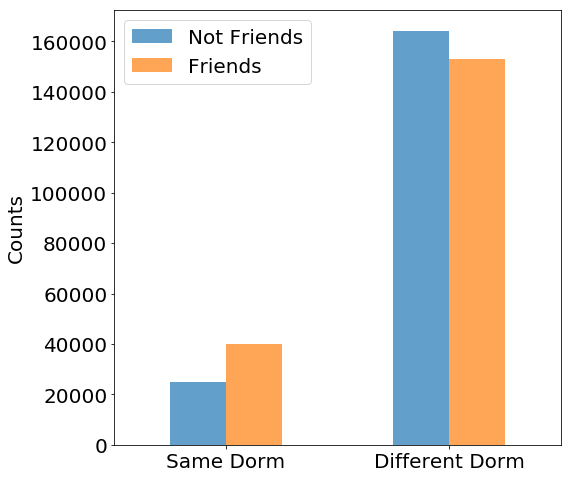

In [65]:
"""
Same Dorm
"""
subdata = data.groupby('edge')['same_dorm']
counts = subdata.value_counts()
counts = [np.array(list(counts))[[1,3]], np.array(list(counts))[[0,2]]]
group_labels = ['Same Dorm', 'Different Dorm']
df = pd.DataFrame(counts, index = group_labels)
fig, ax = plt.subplots(figsize=(8,8))
myfigure = df.plot.bar(alpha = .7, ax = ax, rot =  0)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Counts", size = 20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.savefig('Dorm.png')

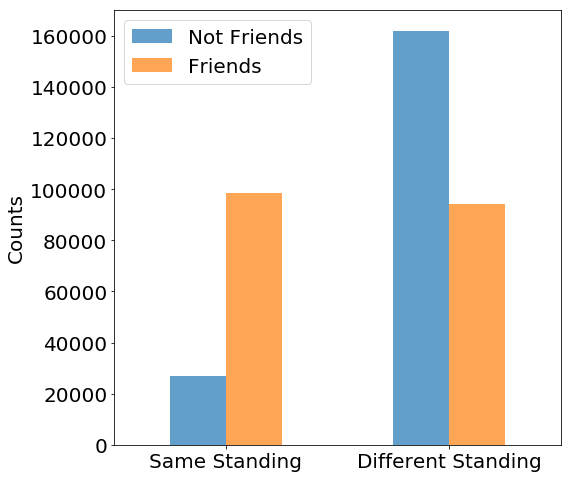

In [66]:
"""
Same Year
"""
subdata = data.groupby('edge')['same_year']
counts = subdata.value_counts()
counts = [np.array(list(counts))[[1,2]], np.array(list(counts))[[0,3]]]
group_labels = ['Same Standing', 'Different Standing']
df = pd.DataFrame(counts, index = group_labels)
fig, ax = plt.subplots(figsize=(8,8))
myfigure = df.plot.bar(alpha = .7, ax = ax, rot =  0)
ax.legend(["Not Friends", "Friends"], fontsize = 20)
ax.set_ylabel("Counts", size = 20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.savefig('Standing.png')